In [1]:
import sys

sys.path.append('/Users/adam.santorelli/lib/pygt3x/')
sys.path.append('/Users/adam.santorelli/lib/')
sys.path.append('/Users/adam.santorelli/lib/wristpy/')
sys.path.append('/Users/adam.santorelli/lib/wristpy/src/wristpy/')

import calendar
import os
from datetime import datetime, timedelta
from typing import Any

import numpy as np
import pandas as pd
import polars as pl



In [2]:
pip install -e "/Users/adam.santorelli/lib/wristpy/"

Obtaining file:///Users/adam.santorelli/lib/wristpy
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for wristpy (pyproject.toml) ... done
  Created wheel for wristpy: filename=wristpy-0.1.0-py3-none-any.whl size=11901 sha256=a8ef2275e5226830f7d7f2f03a24017103da0cdfaee311fee1b249c00e9d8794
  Stored in directory: /private/var/folders/5w/nz07xc215vv587tk6xcmwdg40000gq/T/pip-ephem-wheel-cache-5jps19ge/wheels/f5/62/c3/9c628b38fd17d2883865753005ffb35a450c56a42799ed8f40
Successfully built wristpy
  Attempting uninstall: wristpy
    Found existing installation: wristpy 0.1.0
    Uninstalling wristpy-0.1.0:
      Successfully uninstalled wristpy-0.1.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
file_name = '/Users/adam.santorelli/Documents/NDARAA948MFH.gt3x'


In [4]:
import wristpy

In [36]:
from wristpy.common import data_model

In [6]:
from wristpy.io.loaders import gt3x

In [7]:
test_config = wristpy.common.data_model.Config(file_name, file_name)
test_config.path_input

'/Users/adam.santorelli/Documents/NDARAA948MFH.gt3x'

In [8]:
test_data = gt3x.load(test_config.path_input)

In [9]:
test_data.time

array(['2017-10-10T12:05:00.000', '2017-10-10T12:05:00.033',
       '2017-10-10T12:05:00.066', ..., '2017-12-06T16:35:59.900',
       '2017-12-06T16:35:59.933', '2017-12-06T16:35:59.966'],
      dtype='datetime64[ms]')

In [10]:
test_data.acceleration

X,Y,Z
f32,f32,f32
0.0,0.0625,-1.011719
-0.003906,0.03125,-1.0
-0.003906,0.0234375,-1.003906
0.0,0.027344,-1.007812
-0.003906,0.03125,-1.007812
-0.003906,0.027344,-1.007812
-0.007812,0.027344,-1.003906
-0.007812,0.0234375,-1.007812
0.0,0.0234375,-1.003906


In [17]:
import importlib


<module 'wristpy.ggir.calibration' from '/Users/adam.santorelli/lib/wristpy/src/wristpy/ggir/calibration.py'>

In [44]:
importlib.reload(calibration)
importlib.reload(data_model)

<module 'wristpy.common.data_model' from '/Users/adam.santorelli/lib/wristpy/src/wristpy/common/data_model.py'>

In [45]:
from wristpy.ggir import metrics_calc
from wristpy.ggir import calibration

In [99]:
test_output = calibration.start_ggir_calibration(test_data)

In [100]:
test_output

OutputData(cal_acceleration=shape: (148_231_800, 3)
┌───────────┬──────────┬───────────┐
│ X         ┆ Y        ┆ Z         │
│ ---       ┆ ---      ┆ ---       │
│ f32       ┆ f32      ┆ f32       │
╞═══════════╪══════════╪═══════════╡
│ -0.000775 ┆ 0.04029  ┆ -1.005344 │
│ -0.004682 ┆ 0.009244 ┆ -0.993599 │
│ -0.004682 ┆ 0.001483 ┆ -0.997514 │
│ -0.000775 ┆ 0.005364 ┆ -1.001429 │
│ -0.004682 ┆ 0.009244 ┆ -1.001429 │
│ …         ┆ …        ┆ …         │
│ -0.500886 ┆ 0.85911  ┆ -0.210579 │
│ -0.430558 ┆ 0.828065 ┆ -0.194918 │
│ -0.489165 ┆ 0.897917 ┆ -0.237984 │
│ -0.387579 ┆ 0.715526 ┆ -0.26539  │
│ -0.403208 ┆ 0.595225 ┆ -0.241899 │
└───────────┴──────────┴───────────┘, scale=shape: (3,)
Series: '' [f64]
[
	1.000222
	0.99345
	1.002266
], offset=shape: (3,)
Series: '' [f64]
[
	-0.000775
	-0.021801
	0.008667
], cal_error_end=0.00763, cal_error_start=0.01403, ENMO=shape: (0, 0)
┌┐
╞╡
└┘, anglez=shape: (0, 0)
┌┐
╞╡
└┘, time=array(['2017-10-10T12:05:00.000', '2017-10-10T12:05:00.033',
  

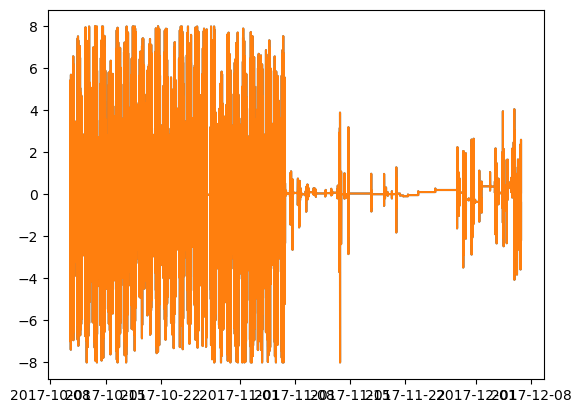

In [48]:
from matplotlib import pyplot as plt 

plt.plot(test_data.time, test_data.acceleration['X'])
plt.plot(test_output.time, test_output.cal_acceleration['X'])
plt.show()

In [101]:
importlib.reload(metrics_calc)


<module 'wristpy.ggir.metrics_calc' from '/Users/adam.santorelli/lib/wristpy/src/wristpy/ggir/metrics_calc.py'>

In [102]:

metrics_calc.calc_base_metrics(test_output)

In [104]:
test_output.enmo.rename({"column_0": "enmo"})

enmo
f32
0.006151
-0.006347
-0.002474
0.001444
0.001482
0.001454
-0.002435
0.001467
-0.002485


In [89]:
sec5_mean = metrics_calc.moving_mean((test_output.enmo),test_output.time,30,5)

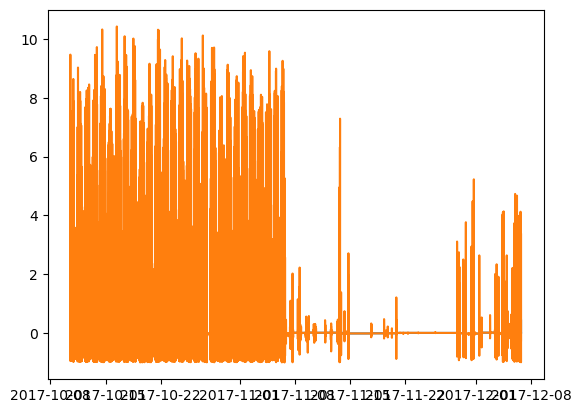

In [84]:
plt.plot(sec5_mean["window_start"], sec5_mean["column_0_mean"])
plt.plot(test_output.time, test_output.enmo)
plt.show()

In [ ]:
ws = 10
min_hours = 72

In [ ]:
from warnings import warn

accel_data = test_data.acceleration
time_data = test_data.time
s_r = test_data.sampling_rate

#n10 = int(10 * s_r)  # samples in 10 seconds, not used because hardcoded 10s
nh = int(min_hours* 3600 * s_r)  # samples in min_hours
n12h = int(12 * 3600 * s_r)  # samples in 12 hours

i_h = 0  # keep track of number of extra 12 hour blocks used

    # check if enough data
if accel_data.height < nh:
    warn(
            f"Less than {min_hours} hours of data ({accel_data.height / (s_r * 3600)} hours). "
            f"No Calibration performed",
            UserWarning,
        )




In [ ]:
    # trim accel data
#i_h += 1
accel_data_trimmed = accel_data[: nh + i_h * n12h]
time_data_trimmed = time_data[: nh + i_h * n12h]

In [ ]:
RM = metrics_calc.moving_mean(accel_data_trimmed, time_data_trimmed, s_r, 10)
acc_rm = RM.select(['X_mean','Y_mean','Z_mean'])

RSD = metrics_calc.moving_std(accel_data_trimmed, time_data_trimmed, s_r, 10)
acc_rsd = RSD.select(['X_std','Y_std','Z_std'])

In [ ]:
from matplotlib import pyplot as plt
#plt.plot(test_data.time, accel_data['X'])
plt.plot(RM['window_start'], np.linalg.norm(acc_rm, axis=1))
plt.show()

In [ ]:
import sklearn.linear_model

In [ ]:
sd_crit = 0.013
no_motion = np.all(acc_rsd < sd_crit, axis=1) & np.all(np.abs(acc_rm) < 2, axis=1)

In [ ]:
acc_rm_nm = acc_rm.filter(no_motion)
acc_rsd_nm = acc_rsd.filter(no_motion)

In [ ]:

tel = 0
for col in acc_rm_nm.columns:
    tmp = (acc_rm_nm[col].min()< -0.3) & (acc_rm_nm[col].max() > 0.3)
    if tmp:
        tel = tel+1

In [ ]:
cal_err_start = np.round(np.mean(abs(np.linalg.norm(acc_rm_nm, axis=1) - 1)), decimals=5)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
offset = pl.Series(np.zeros(3))
scale = pl.Series(np.ones(3).flatten())
tmp_scale = np.zeros((1, 3))

weights = np.ones(acc_rm_nm.shape[0]) * 100
res = [np.Inf]
LR = LinearRegression()

In [ ]:
##Method 1
acc_nm_pd = acc_rm_nm.to_pandas()
curr = (acc_nm_pd* scale) + offset

In [ ]:
## Method 2
scale = np.ones(3).reshape(3,1)
check = acc_rm_nm.select([
    (pl.col(column_name) * scale[i] + offset[i]).alias(column_name)
    for i, column_name in enumerate(acc_rm_nm.columns)
    ])
check_pd = check.to_pandas()


In [ ]:
max_iter = 1000
tol = 1e-10
weights = np.ones(curr.shape[0]) * 100
res = [np.Inf]

for i in range(max_iter): 
    curr = (acc_nm_pd * scale) + offset
    closest_point = curr / np.linalg.norm(curr, axis=1, keepdims=True)
    offsetch = np.zeros(3)
    scalech = np.ones(3)
    
    for k in range(3):
                # there was some code dropping NANs from closest point, but these should
                # be taken care of in the original mask. Division by zero should also
                # not be happening during motionless data, where 1 value should always be close
                # to 1
        x_ = np.vstack(
                    (curr.iloc[:, k])
                )  
        tmp_y = np.vstack(
                    (closest_point.iloc[:, k])
                )
        LR.fit(x_, tmp_y, sample_weight=weights)

        offsetch[k] = LR.intercept_
        scalech[k] = LR.coef_[0]
        curr.iloc[:, k] = x_ @ LR.coef_
    
    scale = scalech * scale
    offset = offsetch + (offset/scale)
    res.append(3 * np.mean(weights[:, None] * (curr - closest_point) ** 2 / weights.sum()))
    weights = np.minimum(1 / np.linalg.norm(curr - closest_point, axis=1), 100)

    if abs(res[i] - res[i - 1]) < tol:
        break
    
print(scale, offset, res)


In [ ]:

acc_cal_pd = (acc_nm_pd* scale) + offset

cal_error_end = np.around(np.mean(abs(np.linalg.norm(acc_cal_pd, axis=1) - 1)), decimals=5)
cal_error_end

In [ ]:
accel_cal_pd = (accel_data.to_pandas() * scale) + offset

In [ ]:
## Method 2
accel_cal = accel_data.select([
    (pl.col(column_name) * scale[i] + offset[i]).alias(column_name)
    for i, column_name in enumerate(accel_data.columns)
    ])

In [ ]:
tmp = accel_cal_pd-accel_data.to_pandas()

In [ ]:
plt.plot(tmp['X'])
plt.show()